#### Add Heading
#### Add steps followed
    

In [1]:
#Import all required libraries:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = None

In [4]:
leads_df = pd.read_csv('datasets/Leads.csv')

In [5]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Inspecting Dataframe
leads_df.shape

(9240, 37)

- Provided dataset has 9240 rows and 37 columns

In [7]:
#Lets check the statistical summary of dataset.
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 ### For simplicity, renameing column names of dataframe. Basically replacing ' ' with '_'

In [8]:
leads_df.columns = leads_df.columns.map(lambda x : x.replace(' ','_'))

In [9]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9240 non-null   object 
 1   Lead_Number                                    9240 non-null   int64  
 2   Lead_Origin                                    9240 non-null   object 
 3   Lead_Source                                    9204 non-null   object 
 4   Do_Not_Email                                   9240 non-null   object 
 5   Do_Not_Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total_Time_Spent_on_Website                    9240 non-null   int64  
 9   Page_Views_Per_Visit                           9103 

- The are many values as 'Select' in dataset, which is equivalent to null [As mentioned in problem statement]
    - Resaon: In the UI, for the fields which has drop down for options to select, if user doesn't select anything, the default value is 'Select'
    - Hence, replacing all such values as null

In [10]:
leads_df.replace('Select', np.nan, inplace=True)

In [11]:
leads_df.nunique(axis=0)

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     18
How_did_you_hear_about_X_Education                  9
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article           

- We can see there are few columns for which distinct value count is 1, hence dropping all such columns

In [12]:
to_drop_1 = ['Magazine','Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content',
            'Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque']

In [13]:
leads_df.drop(to_drop_1, axis=1,inplace=True)

In [14]:
# Handling null values 
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Educatio

- Observation:
    - There are many columns with most of the values as null. 
    - Hence, dropping columns with null values more than 40%
    - 'City' Column is also approx to 40%, we can consider 'City column also to drop
    - Also, column 'Lead_Number' seems to be identifier, hecne dropping.

In [15]:
to_drop_2 = ['How_did_you_hear_about_X_Education','Lead_Quality','Lead_Profile','Asymmetrique_Activity_Index',
            'City','Asymmetrique_Activity_Index','Asymmetrique_Profile_Index','Asymmetrique_Activity_Score',
            'Asymmetrique_Profile_Score','Lead_Number']

In [16]:
leads_df.drop(to_drop_2, axis=1, inplace=True)

In [17]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9240 non-null   object 
 1   Lead_Origin                                    9240 non-null   object 
 2   Lead_Source                                    9204 non-null   object 
 3   Do_Not_Email                                   9240 non-null   object 
 4   Do_Not_Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total_Time_Spent_on_Website                    9240 non-null   int64  
 8   Page_Views_Per_Visit                           9103 non-null   float64
 9   Last_Activity                                  9137 

In [18]:
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper                                         0.00
Digital_Ad

- 2 columns with 36% of values as null
    - Tags
    - Specialization
- Lets analyze both the categorical column and see significance

In [19]:
leads_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [20]:
leads_df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

- Observation:
    - Specialization : From values we see they are some predefined categories 
    - Tags : Whereas, Tags seems to be like comments, which varies.
- Hence, dropping column 'Tags'

In [21]:
leads_df.drop('Tags', axis=1, inplace=True)

In [22]:
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper                                         0.00
Digital_Ad

In [23]:
leads_df.shape

(9240, 22)

- Observation:
    - 4 columns with higher percentage of missing values:
        - Considering the problem statement, these columns seems to important and hence, its not good to drop those columns.
        - Therefore, replacing the null values of with 'NA' (Additional category)
    - For other columns with minimal percentage of null values:
        - Choosing rows with sum less than 1

In [24]:
cols_to_na = ['Country','Specialization','What_is_your_current_occupation',
                'What_matters_most_to_you_in_choosing_a_course']

leads_df[cols_to_na] = leads_df[cols_to_na].fillna('NA')

In [25]:
leads_df= leads_df[leads_df.isnull().sum(axis=1) < 1]

In [26]:
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                      0.0
Lead_Origin                                      0.0
Lead_Source                                      0.0
Do_Not_Email                                     0.0
Do_Not_Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total_Time_Spent_on_Website                      0.0
Page_Views_Per_Visit                             0.0
Last_Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What_is_your_current_occupation                  0.0
What_matters_most_to_you_in_choosing_a_course    0.0
Search                                           0.0
Newspaper_Article                                0.0
X_Education_Forums                               0.0
Newspaper                                        0.0
Digital_Advertisement                         

In [27]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9074 non-null   object 
 1   Lead_Origin                                    9074 non-null   object 
 2   Lead_Source                                    9074 non-null   object 
 3   Do_Not_Email                                   9074 non-null   object 
 4   Do_Not_Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total_Time_Spent_on_Website                    9074 non-null   int64  
 8   Page_Views_Per_Visit                           9074 non-null   float64
 9   Last_Activity                                  9074 

In [28]:
### Data Imbalance Check

In [29]:
round((leads_df.Converted.sum()/len(leads_df.Converted.index))*100)

38

- Its 38%, which means data is not imbalanced

# EDA

- 1. Univariant Analysis - Categorical Columns

In [30]:
# Create two differnt datasets based on target feature viz. "Converted"
## 1. df_0 -> records for which converted = 0 
## 2. df_1 -> records for which converted = 1

In [31]:
df_0 = leads_df[leads_df.Converted == 0]
df_1 = leads_df[leads_df.Converted == 1]

In [32]:
#Creating list of columns for which Dtype is object. Which means they are categoical columns \
cat_cols = list(leads_df.select_dtypes(include='object').columns)

In [33]:
cat_cols

['Prospect_ID',
 'Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Last_Activity',
 'Country',
 'Specialization',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Search',
 'Newspaper_Article',
 'X_Education_Forums',
 'Newspaper',
 'Digital_Advertisement',
 'Through_Recommendations',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

- Two columns 'Prospect_ID' and 'Lead_Origin' are identifiers of each row, hence removing it from categorical columms list for Univariant analysis

In [34]:
cat_cols = cat_cols[2:]

In [35]:
## Function to plot comparision between Converted and Non Converted based on Categorical columns\
def plot_cat_cols(df_0, df_1, col, rot=0):

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    ## PLOT1
    sns.countplot(x=col, data=df_0,ax=ax1,palette='Reds_r')
    ax1.set_title('Not Converted',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rot, ha="right")
    
    #Additing annotation in plots for better analysis
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_0))*100), (p.get_x()+0.1, p.get_height()+50))
    #---------------------------------------------
    ## PLOT2
    sns.countplot(x=col, data=df_1,ax=ax2, palette='Greens_r')
    ax2.set_title('Converted',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=rot, ha="right")
    
    #Additing annotation in plots for better analysis
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

------For Column : 'Lead_Source' --------


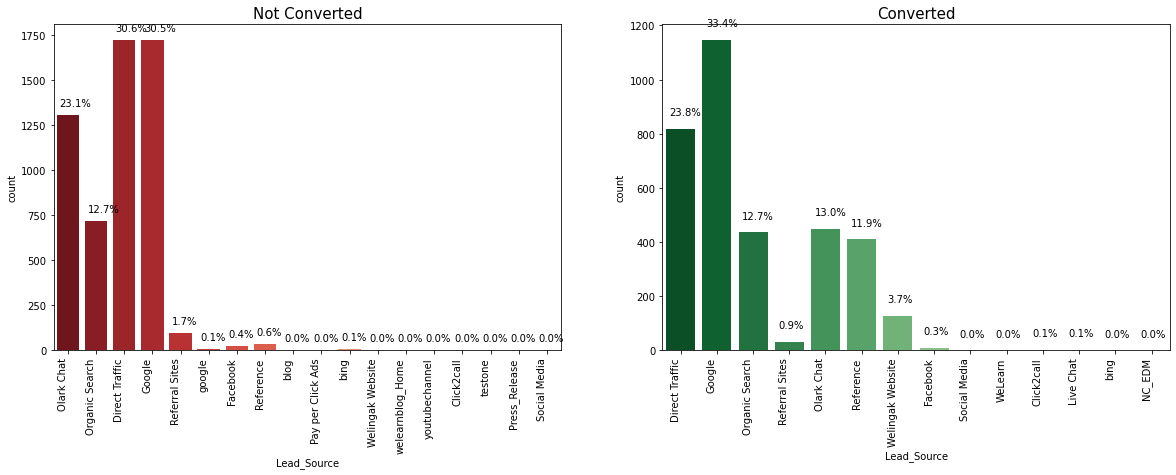



------For Column : 'Do_Not_Email' --------


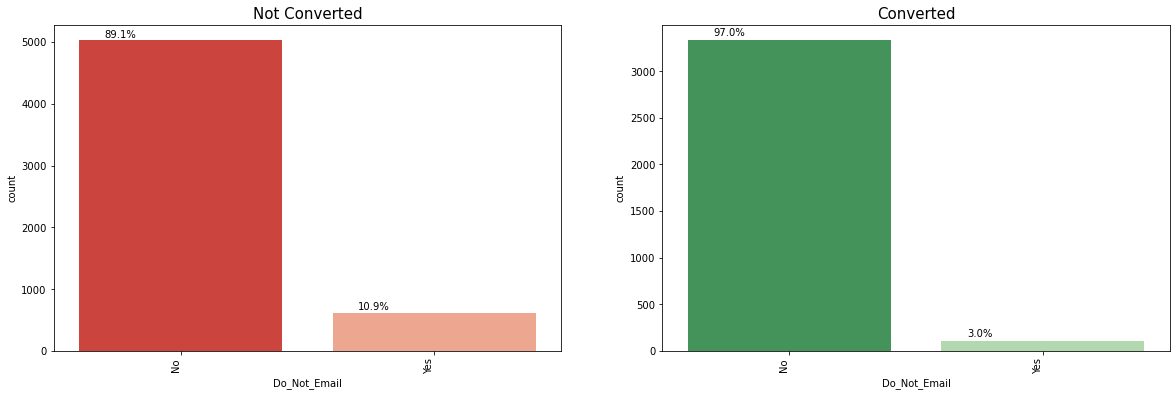



------For Column : 'Do_Not_Call' --------


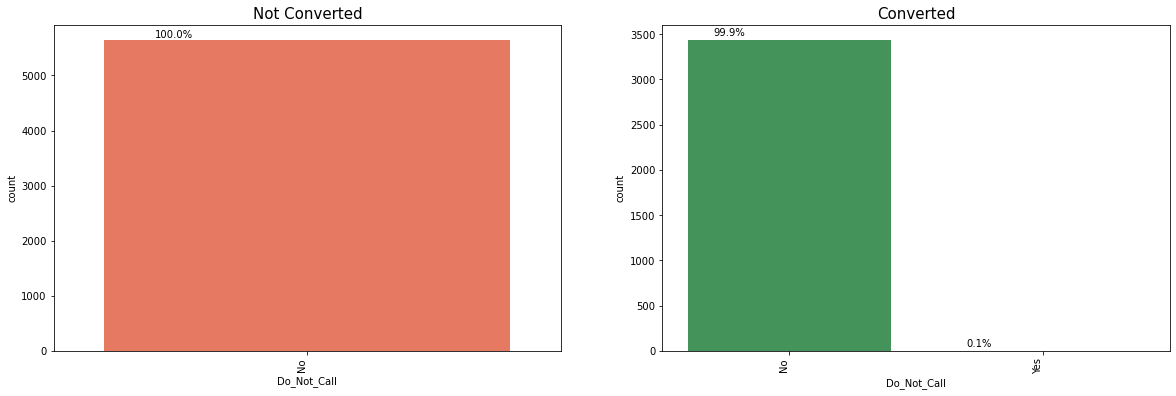



------For Column : 'Last_Activity' --------


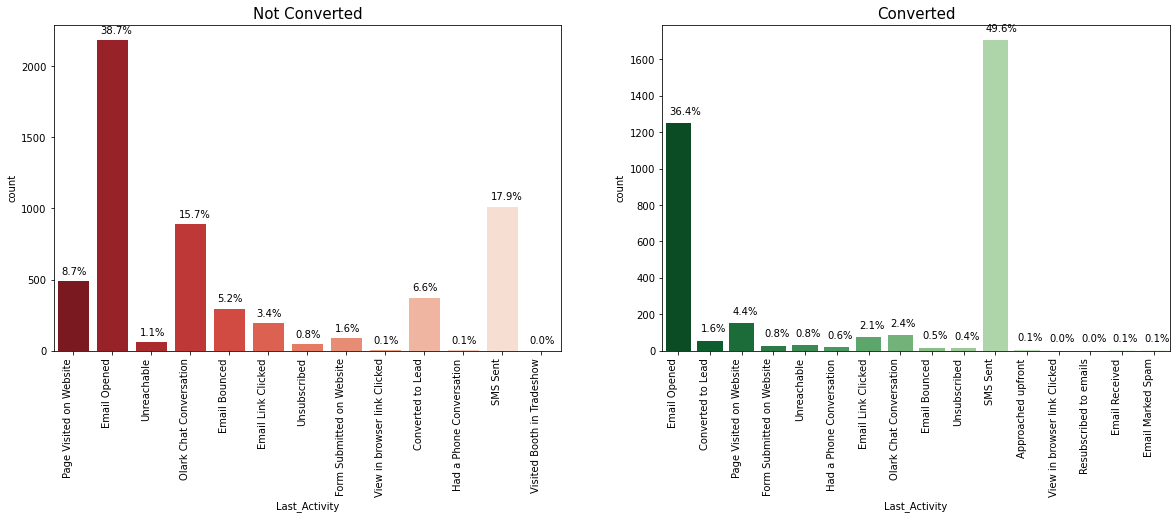



------For Column : 'Country' --------


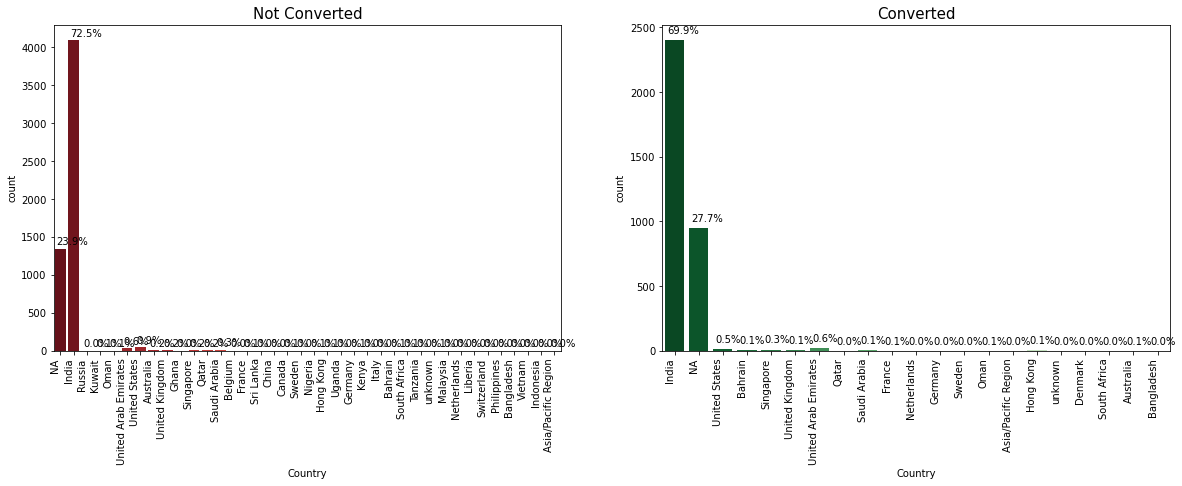



------For Column : 'Specialization' --------


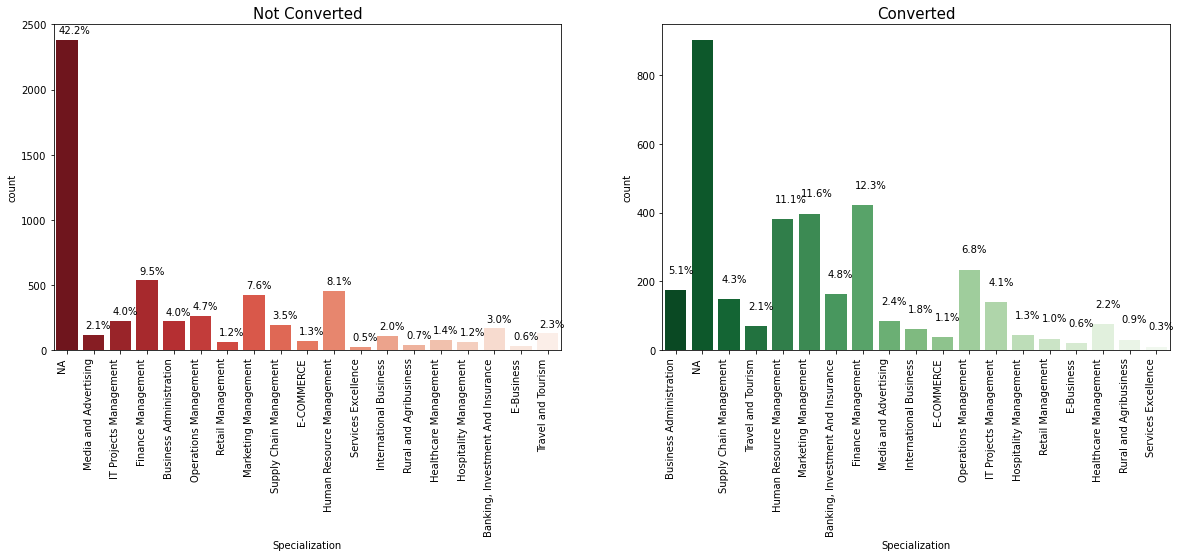



------For Column : 'What_is_your_current_occupation' --------


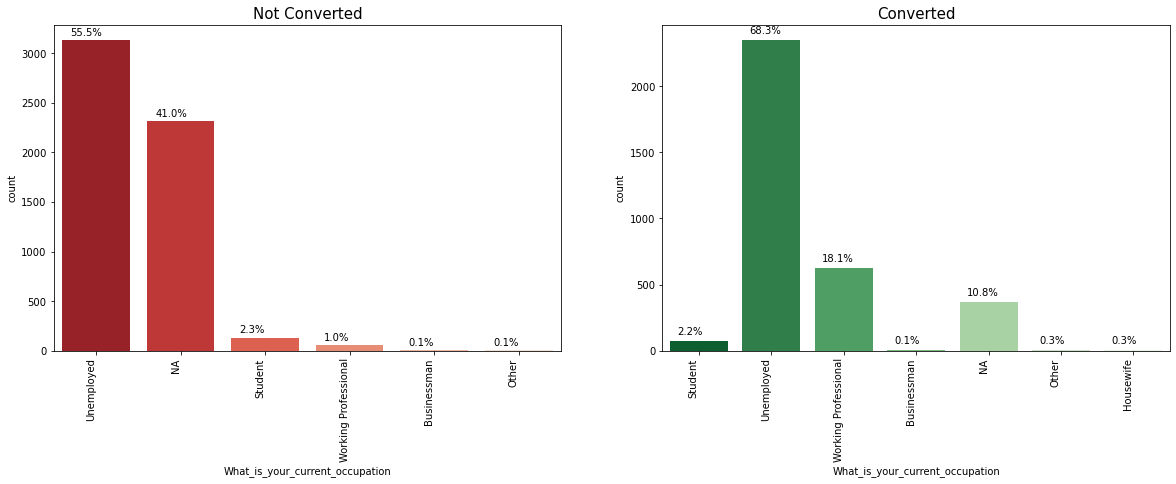



------For Column : 'What_matters_most_to_you_in_choosing_a_course' --------


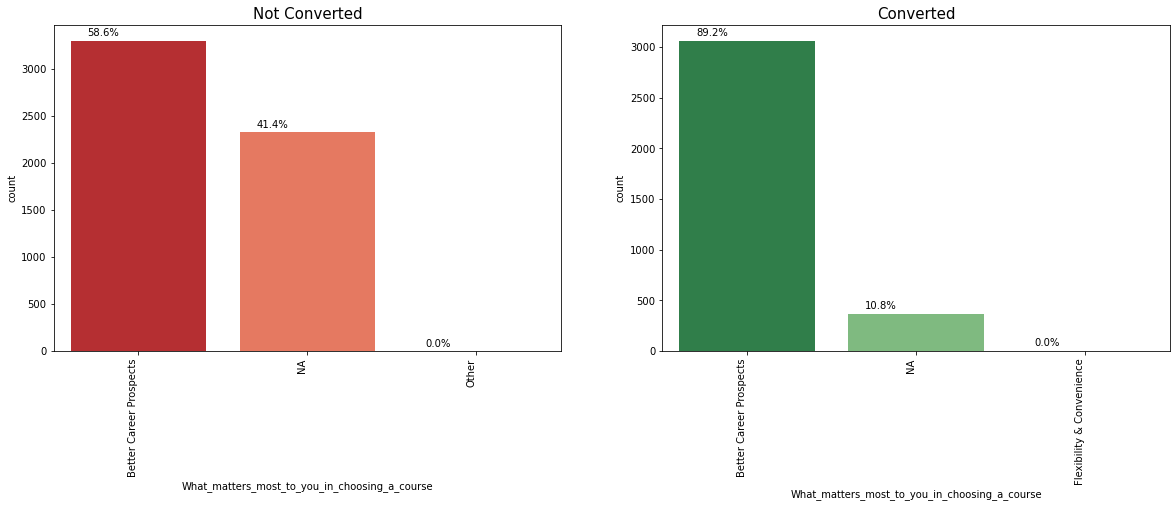



------For Column : 'Search' --------


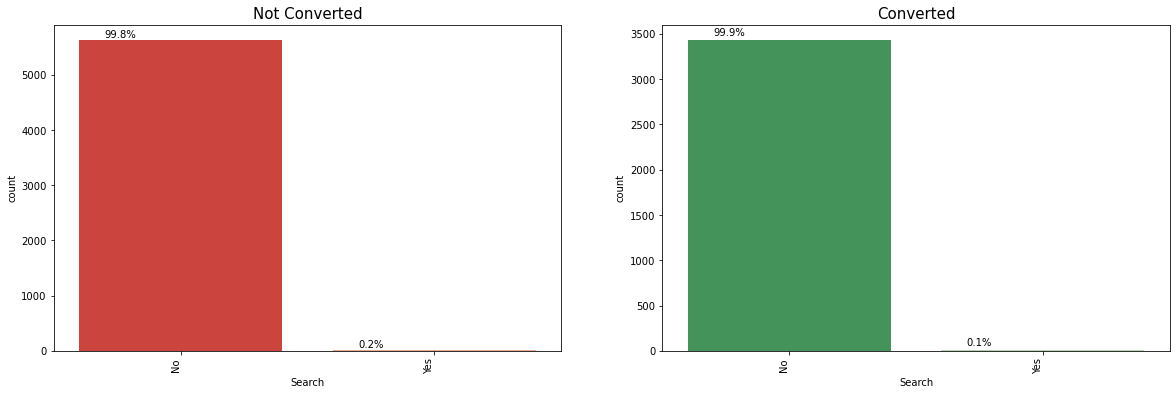



------For Column : 'Newspaper_Article' --------


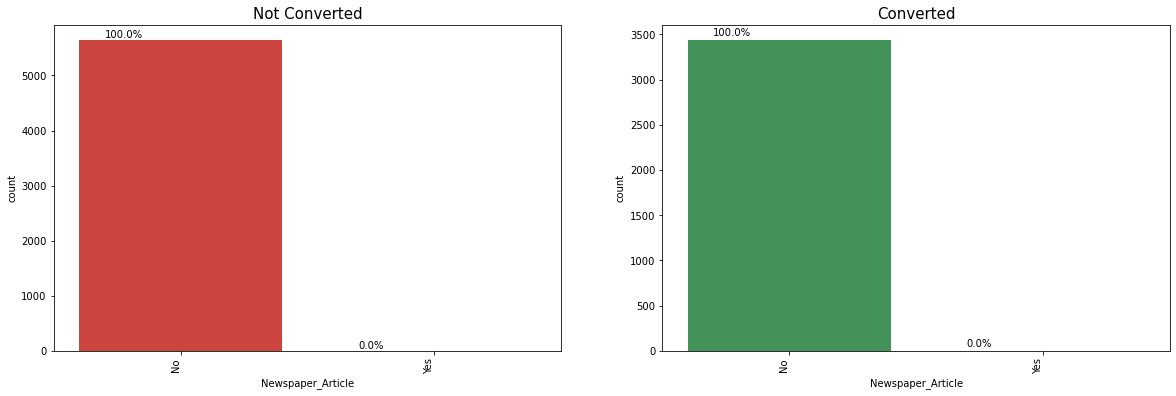



------For Column : 'X_Education_Forums' --------


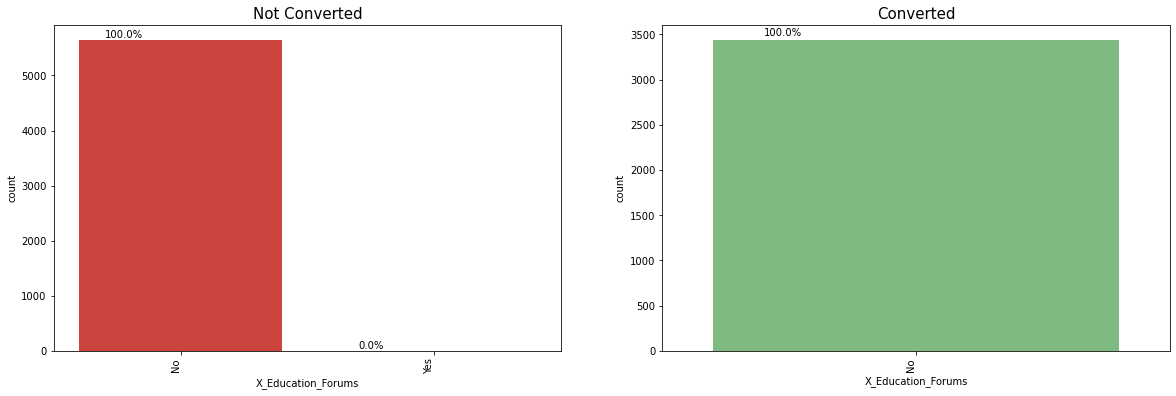



------For Column : 'Newspaper' --------


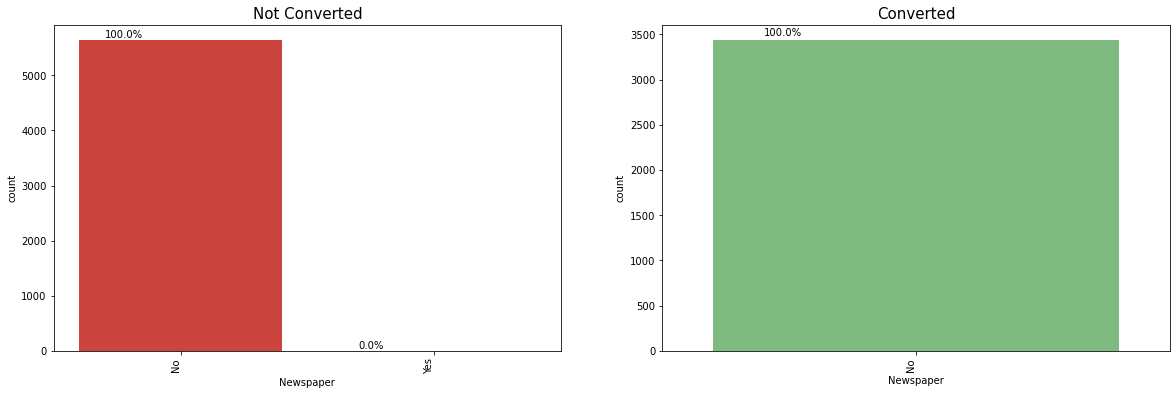



------For Column : 'Digital_Advertisement' --------


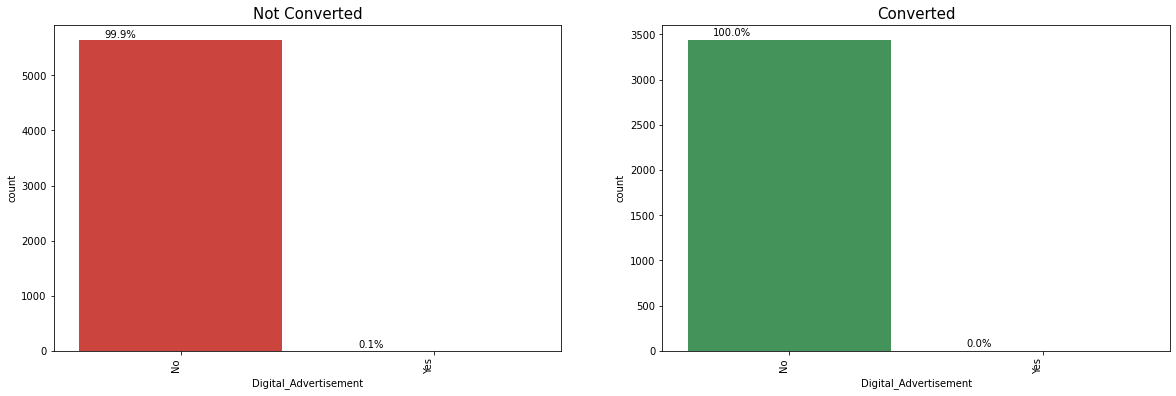



------For Column : 'Through_Recommendations' --------


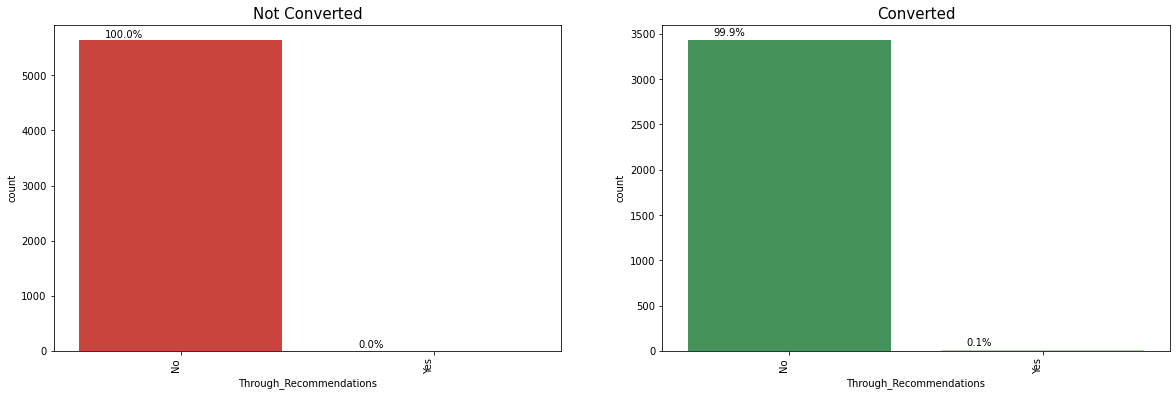



------For Column : 'A_free_copy_of_Mastering_The_Interview' --------


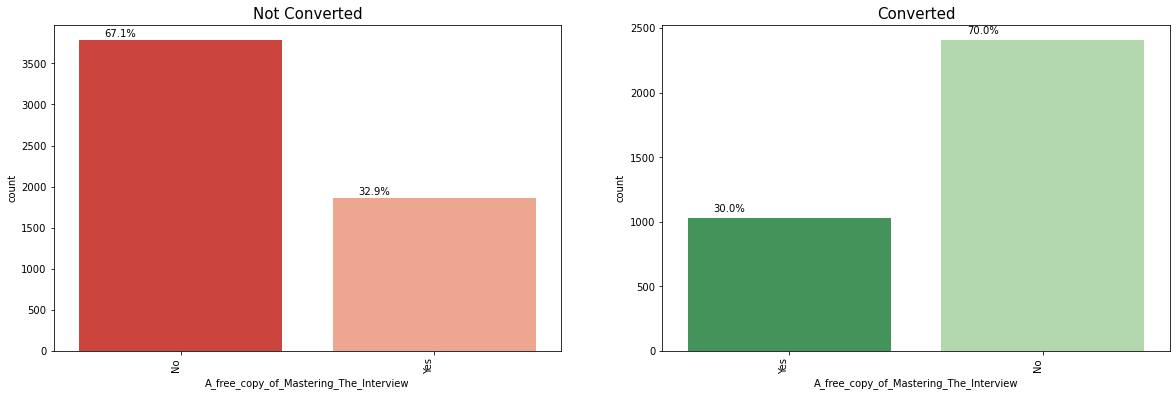



------For Column : 'Last_Notable_Activity' --------


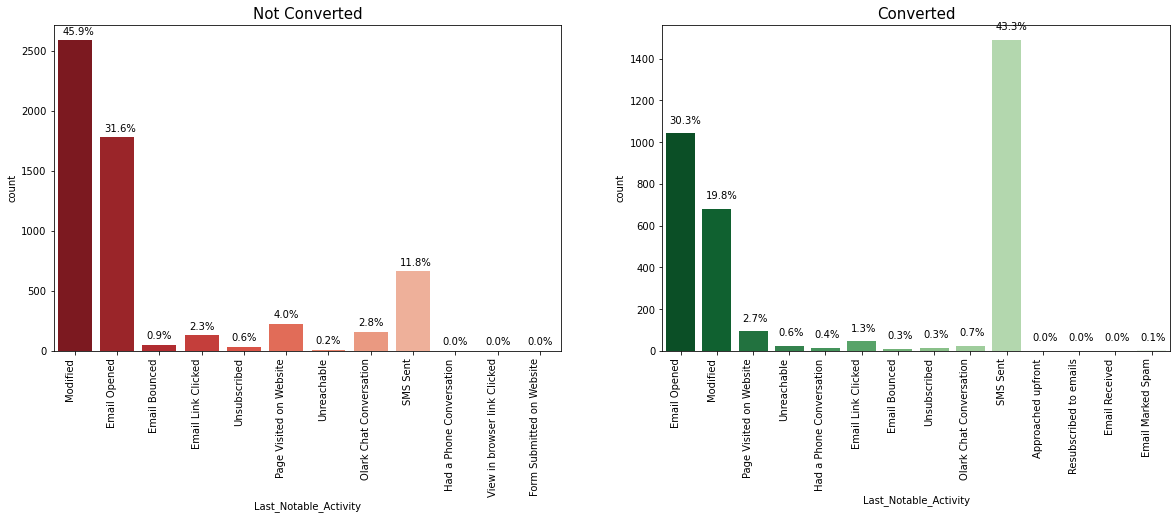

In [36]:
for i in cat_cols:
    print(f"""------For Column : '{i}' --------""")
    plot_cat_cols(df_0,  df_1, i, rot=90)
    print('\n')
    

- From above graphs, we see most of the columns has 99% single value or 100%, Like **'Do_Not_Call', 'X_Education_Forums'** etc

In [37]:
leads_df.Do_Not_Call.value_counts()

No     9072
Yes       2
Name: Do_Not_Call, dtype: int64

In [38]:
leads_df.X_Education_Forums.value_counts()

No     9073
Yes       1
Name: X_Education_Forums, dtype: int64

- Therefore, dropping all such features

In [39]:
to_drop_3 = ['Do_Not_Email','Do_Not_Call','What_matters_most_to_you_in_choosing_a_course','Search',
            'Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement',
            'Through_Recommendations']

In [40]:
leads_df.drop(to_drop_3, axis=1, inplace=True)

In [41]:
leads_df.head()

,Prospect_ID,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NA,NA,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NA,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NA,Unemployed,No,Modified


- 2. Univariant Analysis - Numerical Columns

In [42]:
num_cols = list(leads_df.select_dtypes(include=['int64','float64']).columns)

In [43]:
num_cols

['Converted',
 'TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit']

In [44]:
#Again column 'Lead Number' is an Identifier, hence dropping it from list for analysis
num_cols= num_cols[2:]

In [45]:
## Function to plot distribution in categorical variables
def plot_dist(col):
    f,(ax1,ax2) = plt.subplots(1,2,sharey=True,gridspec_kw={'width_ratios':[1,1]},figsize=(15,4))
    print("                            For : ",i)
    plt1=sns.distplot(df_0[col], ax=ax1,hist = False, color='Red')
    plt1.axes.set_title('Not Converted')
    
    plt2=sns.distplot(df_1[col], ax=ax2,hist = False, color='Green')
    plt2.axes.set_title('Converted')
    plt.show()

                            For :  Total_Time_Spent_on_Website


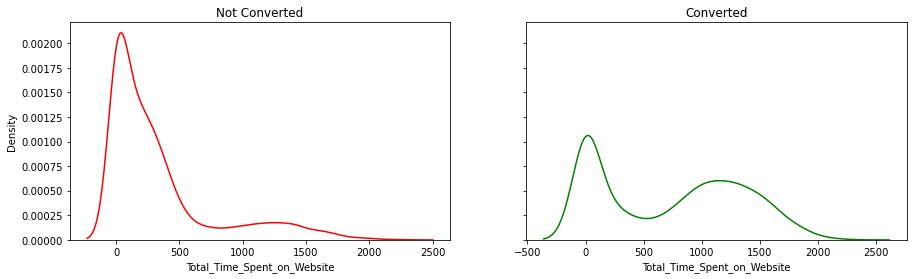

                            For :  Page_Views_Per_Visit


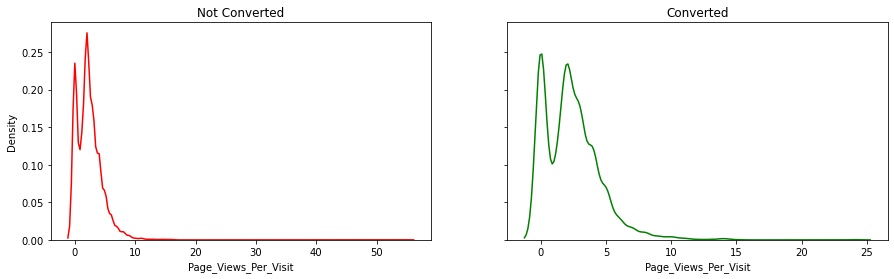

In [46]:
for i in num_cols:
    plot_dist(i)

- Bivarient Analysis

<AxesSubplot:>

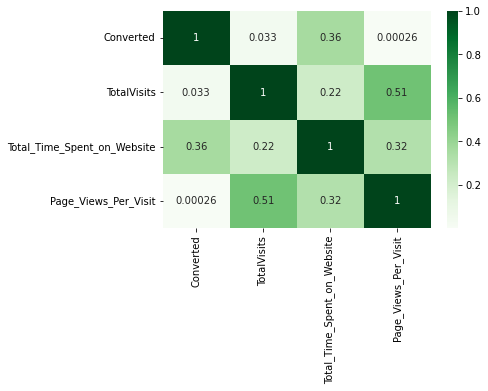

In [47]:
sns.heatmap(leads_df.corr(), annot=True,cmap='Greens')

- Observation:
    - As 'Converted' column is target, we can ignore in correlation
    - Columns 'Page_Views_Per_Visit' and 'TotalVisits' seems to be correalted much if we compared but value is not much.
    - Hence, no action

#### Addition observation after performing EDA
    - In Country column, mostly it is India (Higher Percentage).
    - Hence we can categorize country column as 'India' and 'Foreign'

In [48]:
leads_df.Country.value_counts()

India                   6491
NA                      2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [49]:
def convert_country_col(country_name):
    if country_name == 'NA':
        return 'NA'
    elif country_name == 'India':
        return 'India'
    else:
        return 'Foreign'


In [50]:
leads_df.Country=leads_df.Country.apply(lambda x : convert_country_col(x))

In [51]:
leads_df.Country.value_counts()

India      6491
NA         2296
Foreign     287
Name: Country, dtype: int64

In [52]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect_ID                             9074 non-null   object 
 1   Lead_Origin                             9074 non-null   object 
 2   Lead_Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total_Time_Spent_on_Website             9074 non-null   int64  
 6   Page_Views_Per_Visit                    9074 non-null   float64
 7   Last_Activity                           9074 non-null   object 
 8   Country                                 9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What_is_your_current_occupation         9074 non-null   obje

In [53]:
leads_df.isnull().sum()

Prospect_ID                               0
Lead_Origin                               0
Lead_Source                               0
Converted                                 0
TotalVisits                               0
Total_Time_Spent_on_Website               0
Page_Views_Per_Visit                      0
Last_Activity                             0
Country                                   0
Specialization                            0
What_is_your_current_occupation           0
A_free_copy_of_Mastering_The_Interview    0
Last_Notable_Activity                     0
dtype: int64

In [54]:
leads_df.head()

,Prospect_ID,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NA,NA,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NA,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NA,Unemployed,No,Modified


- Observation:
    - Column 'A_free_copy_of_Mastering_The_Interview' which has binary value YES/NO
    - Converting them to 1 and 0 

In [55]:
leads_df.A_free_copy_of_Mastering_The_Interview.value_counts()

No     6186
Yes    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

In [56]:
leads_df.A_free_copy_of_Mastering_The_Interview = leads_df.A_free_copy_of_Mastering_The_Interview.apply(lambda x: 1 if x == 'Yes' else 0)

In [57]:
leads_df.head()

,Prospect_ID,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NA,NA,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NA,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NA,Unemployed,0,Modified


### Dummy Variable

In [58]:
#Creating function for dummy varibales of categorical columns
def dummies_drop_maxlen_col(lst : list, df) :
    """
    ****Prashik Bansod******
    Two arguments :
        1. List of columns names
        2. Pandas dataframe
    return : A dataframe with dummy variables without longest column name
    """
    for i in lst:
        i_tmp = pd.get_dummies(df[i],prefix=i)
        final_nm = {}
        for col_nm in i_tmp.columns:
            final_nm[col_nm] = len(col_nm)
        to_drop = max(final_nm, key=lambda x : final_nm[x])
        i_tmp = i_tmp.drop([to_drop], axis = 1)
        df = pd.concat([df,i_tmp], axis=1)
    return df
        

In [59]:
cat_cols_new = list(leads_df.select_dtypes(include='object').columns)
cat_cols_new = cat_cols_new[1:]

In [60]:
leads_df_final = dummies_drop_maxlen_col(cat_cols_new, leads_df)

In [61]:
leads_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 93 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Prospect_ID                                      9074 non-null   object 
 1   Lead_Origin                                      9074 non-null   object 
 2   Lead_Source                                      9074 non-null   object 
 3   Converted                                        9074 non-null   int64  
 4   TotalVisits                                      9074 non-null   float64
 5   Total_Time_Spent_on_Website                      9074 non-null   int64  
 6   Page_Views_Per_Visit                             9074 non-null   float64
 7   Last_Activity                                    9074 non-null   object 
 8   Country                                          9074 non-null   object 
 9   Specialization                

In [62]:
# Drop features which we converted using get_dummies
leads_df_final.drop(cat_cols_new, axis=1, inplace=True)
leads_df_final.columns=leads_df_final.columns.map(lambda x : x.replace(' ','_'))

In [63]:
leads_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Prospect_ID                                      9074 non-null   object 
 1   Converted                                        9074 non-null   int64  
 2   TotalVisits                                      9074 non-null   float64
 3   Total_Time_Spent_on_Website                      9074 non-null   int64  
 4   Page_Views_Per_Visit                             9074 non-null   float64
 5   A_free_copy_of_Mastering_The_Interview           9074 non-null   int64  
 6   Lead_Origin_API                                  9074 non-null   uint8  
 7   Lead_Origin_Lead_Add_Form                        9074 non-null   uint8  
 8   Lead_Origin_Lead_Import                          9074 non-null   uint8  
 9   Lead_Source_Click2call        

## Model Building

### Train Test Split


In [64]:
## Creating X and y datasets, X -> features and Y-> target 

### dropping target column and identifier column
X = leads_df_final.drop(['Prospect_ID','Converted'], axis=1)

In [65]:
y = leads_df_final['Converted']

In [66]:
X_train, X_test, y_train,y_test = train_test_split(X, y ,train_size=0.7, random_state=100)

In [67]:
X_train.shape

(6351, 84)

In [68]:
X_test.shape

(2723, 84)

In [69]:
X_train.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_API,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Click2call,Lead_Source_Direct_Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live_Chat,Lead_Source_NC_EDM,Lead_Source_Olark_Chat,Lead_Source_Organic_Search,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral_Sites,Lead_Source_Social_Media,Lead_Source_WeLearn,Lead_Source_Welingak_Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached_upfront,Last_Activity_Converted_to_Lead,Last_Activity_Email_Bounced,Last_Activity_Email_Link_Clicked,Last_Activity_Email_Marked_Spam,Last_Activity_Email_Opened,Last_Activity_Email_Received,Last_Activity_Form_Submitted_on_Website,Last_Activity_Had_a_Phone_Conversation,Last_Activity_Olark_Chat_Conversation,Last_Activity_Page_Visited_on_Website,Last_Activity_Resubscribed_to_emails,Last_Activity_SMS_Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_Visited_Booth_in_Tradeshow,Country_India,Country_NA,Specialization_Business_Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance_Management,Specialization_Healthcare_Management,Specialization_Hospitality_Management,Specialization_Human_Resource_Management,Specialization_IT_Projects_Management,Specialization_International_Business,Specialization_Marketing_Management,Specialization_Media_and_Advertising,Specialization_NA,Specialization_Operations_Management,Specialization_Retail_Management,Specialization_Rural_and_Agribusiness,Specialization_Services_Excellence,Specialization_Supply_Chain_Management,Specialization_Travel_and_Tourism,What_is_your_current_occupation_Businessman,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_NA,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,Last_Notable_Activity_Approached_upfront,Last_Notable_Activity_Email_Bounced,Last_Notable_Activity_Email_Link_Clicked,Last_Notable_Activity_Email_Marked_Spam,Last_Notable_Activity_Email_Opened,Last_Notable_Activity_Email_Received,Last_Notable_Activity_Form_Submitted_on_Website,Last_Notable_Activity_Had_a_Phone_Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
3009,2.0,397,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1012,2.0,190,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4750,2.0,1380,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7987,5.0,1584,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Feature Scaling

In [70]:
X_train.nunique()

TotalVisits                                        35
Total_Time_Spent_on_Website                      1563
Page_Views_Per_Visit                               98
A_free_copy_of_Mastering_The_Interview              2
Lead_Origin_API                                     2
                                                 ... 
Last_Notable_Activity_Page_Visited_on_Website       2
Last_Notable_Activity_Resubscribed_to_emails        2
Last_Notable_Activity_SMS_Sent                      2
Last_Notable_Activity_Unreachable                   2
Last_Notable_Activity_Unsubscribed                  2
Length: 84, dtype: int64

In [71]:
feat_scale_cols = ['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']

In [72]:
scalar = MinMaxScaler()

In [73]:
X_train[feat_scale_cols] = scalar.fit_transform(X_train[feat_scale_cols])

In [74]:
X_train[feat_scale_cols].describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,6351.000000,6351.000000,6351.000000
mean,0.013831,0.217585,0.099046
std,0.020602,0.244868,0.087462
min,0.000000,0.000000,0.000000
25%,0.003984,0.004492,0.041667
50%,0.011952,0.110961,0.083333
75%,0.019920,0.413522,0.138750
max,1.000000,1.000000,1.000000


<AxesSubplot:>

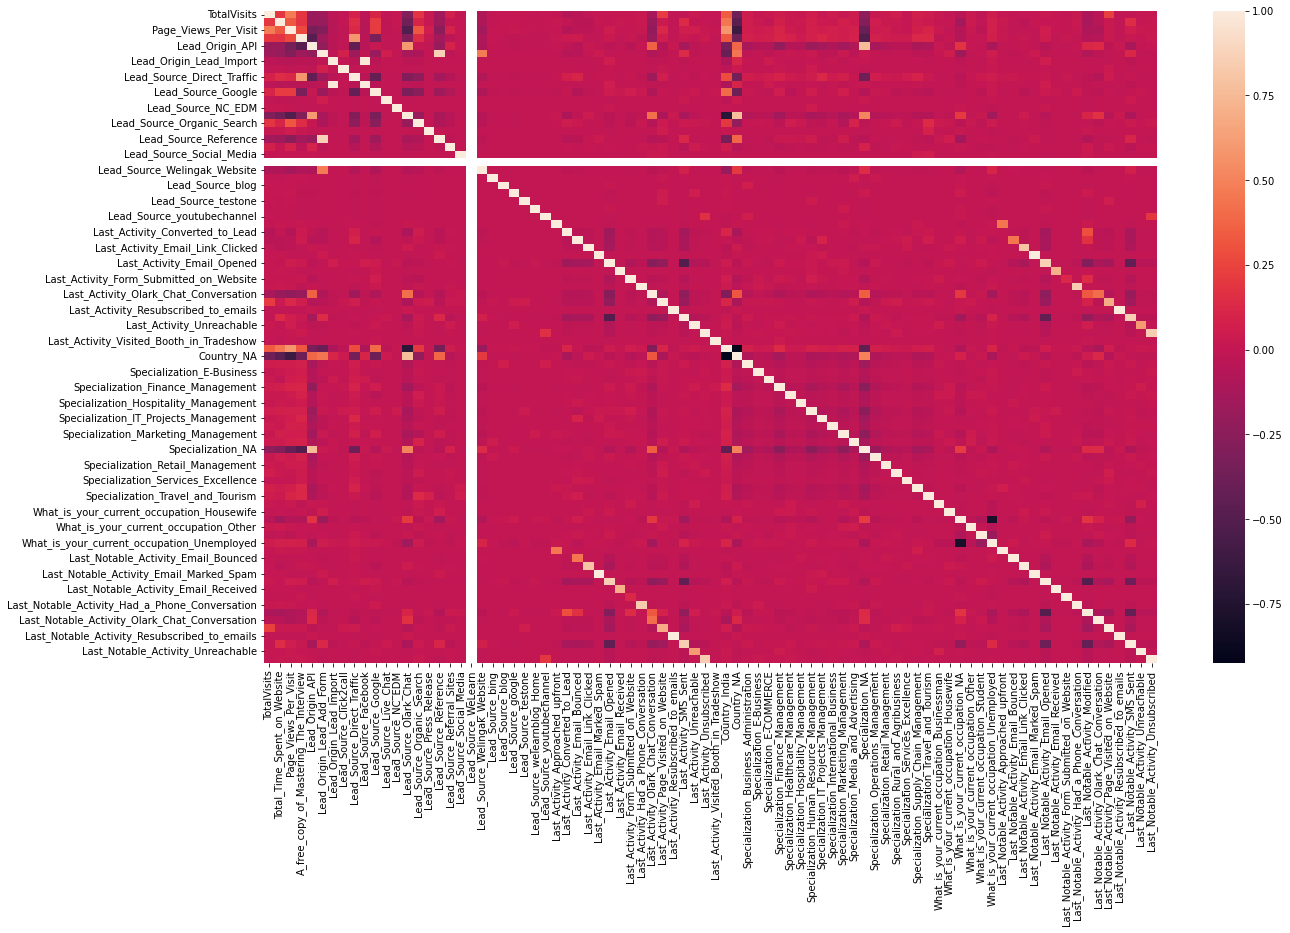

In [75]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr())

- Observation
    - There are lot of variables which are correalted.
    - From heatmap, its hard to figure out such columns. 
    - We will take help of RFE (Recursive Feature Elimination)

In [76]:
logreg = LogisticRegression()

In [77]:
rfe = RFE(logreg, 15) 

In [78]:
#fit training dataset
rfe = rfe.fit(X_train, y_train)

In [79]:
cols = X_train.columns[rfe.support_]

In [80]:
cols

Index(['TotalVisits', 'Total_Time_Spent_on_Website',
       'Lead_Origin_Lead_Add_Form', 'Lead_Source_Welingak_Website',
       'Last_Activity_Approached_upfront', 'Last_Activity_Email_Bounced',
       'Last_Activity_Had_a_Phone_Conversation',
       'Last_Activity_Olark_Chat_Conversation', 'Last_Activity_SMS_Sent',
       'Country_NA', 'What_is_your_current_occupation_NA',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed',
       'Last_Notable_Activity_Had_a_Phone_Conversation',
       'Last_Notable_Activity_Unreachable'],
      dtype='object')

In [81]:
#RFE has given us top 15 feature, updating train dataframe with those columns only 

In [82]:
X_train = X_train[cols]

### Model Building

In [83]:
##Function for model building 
def build_statsmodel(train_X,train_y):
    """
    Function to take features dataframe and target data frame and returns model as output using statsmodel
    """
    X_train_sm = sm.add_constant(train_X)
    model = sm.GLM(train_y, X_train_sm, family=sm.families.Binomial())
    model = model.fit()
    return model, X_train_sm

In [84]:
model_1, X_train_sm_1 = build_statsmodel(X_train,y_train)

In [85]:
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.7
Date:                Tue, 09 Aug 2022   Deviance:                       5249.3
Time:                        01:49:47   Pearson chi2:                 6.24e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### Manual feature elimination
- RFE has given 15 features. There are high value of correlations present between 15 features, i.e, there is still come multicollinearity among the features
- Lets use VIF - Variation infaltion factor, to eliminate redundant features

In [86]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [87]:
calculate_vif(X_train)

,Feature,VIF
6,Last_Activity_Had_a_Phone_Conversation,3.41
13,Last_Notable_Activity_Had_a_Phone_Conversation,3.40
12,What_is_your_current_occupation_Unemployed,2.57
9,Country_NA,2.38
1,Total_Time_Spent_on_Website,2.05
2,Lead_Origin_Lead_Add_Form,1.81
10,What_is_your_current_occupation_NA,1.79
0,TotalVisits,1.60
8,Last_Activity_SMS_Sent,1.56
7,Last_Activity_Olark_Chat_Conversation,1.43


- Observation:
    - VIF values seems to be fine. All are below 5
    - However, some features has higher p-values, hence dropping them.

In [88]:
# Feature "Last_Activity_Approached_upfront"
X_train = X_train.drop('Last_Activity_Approached_upfront', axis=1)

In [89]:
# Rebuilding Model 
## Model #2
model_2, X_train_sm_2 = build_statsmodel(X_train,y_train)

In [90]:
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.1
Date:                Tue, 09 Aug 2022   Deviance:                       5256.3
Time:                        01:49:47   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [91]:
#Check VIF again 
calculate_vif(X_train)

,Feature,VIF
5,Last_Activity_Had_a_Phone_Conversation,3.41
12,Last_Notable_Activity_Had_a_Phone_Conversation,3.40
11,What_is_your_current_occupation_Unemployed,2.56
8,Country_NA,2.38
1,Total_Time_Spent_on_Website,2.05
2,Lead_Origin_Lead_Add_Form,1.81
9,What_is_your_current_occupation_NA,1.79
0,TotalVisits,1.60
7,Last_Activity_SMS_Sent,1.56
6,Last_Activity_Olark_Chat_Conversation,1.43


- Observation 
    - VIF values are ok
    - p-values of some variables are still high

In [92]:
# Column "Last_Activity_Had_a_Phone_Conversation"
X_train = X_train.drop('Last_Activity_Had_a_Phone_Conversation', axis=1)

In [93]:
## Model 3

model_3, X_train_sm_3 = build_statsmodel(X_train, y_train)

In [94]:
print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.7
Date:                Tue, 09 Aug 2022   Deviance:                       5257.4
Time:                        01:49:47   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [95]:
calculate_vif(X_train)

,Feature,VIF
10,What_is_your_current_occupation_Unemployed,2.56
7,Country_NA,2.38
1,Total_Time_Spent_on_Website,2.04
2,Lead_Origin_Lead_Add_Form,1.81
8,What_is_your_current_occupation_NA,1.79
0,TotalVisits,1.60
6,Last_Activity_SMS_Sent,1.56
5,Last_Activity_Olark_Chat_Conversation,1.43
3,Lead_Source_Welingak_Website,1.31
4,Last_Activity_Email_Bounced,1.07


- Observation 
    - VIF values are ok
    - p-values of model 3 is ok. All features are significant

### Therefore, final Model is Model number 3

In [96]:
print(model_3.params)

const                                             0.014924
TotalVisits                                       5.923088
Total_Time_Spent_on_Website                       4.659829
Lead_Origin_Lead_Add_Form                         2.213888
Lead_Source_Welingak_Website                      1.964716
Last_Activity_Email_Bounced                      -2.092380
Last_Activity_Olark_Chat_Conversation            -1.271830
Last_Activity_SMS_Sent                            1.236630
Country_NA                                        1.570437
What_is_your_current_occupation_NA               -3.611952
What_is_your_current_occupation_Student          -2.202346
What_is_your_current_occupation_Unemployed       -2.336460
Last_Notable_Activity_Had_a_Phone_Conversation    3.681176
Last_Notable_Activity_Unreachable                 2.085249
dtype: float64


## Predictions

In [97]:
y_train_pred = model_3.predict(X_train_sm_3)

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)

In [99]:
y_train_pred.shape

(6351,)

In [100]:
### Creating new dataframe with actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob': y_train_pred})

In [101]:
y_train_pred_final.head()

,Converted,Conversion_prob
0,0,0.061875
1,0,0.163485
2,0,0.619053
3,1,0.640064
4,1,0.912853


In [102]:
# Now lets take threshold as 0.5, so if pred probability is greater than 0.5 Churn is 1 else 0 
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.apply(lambda x : 1 if x > 0.5 else 0)

In [103]:
y_train_pred_final.head()

,Converted,Conversion_prob,predicted
0,0,0.061875,0
1,0,0.163485,0
2,0,0.619053,1
3,1,0.640064,1
4,1,0.912853,1


- Observation
    - Here we have choosen threshold as 0.5 at random. The predicted values definitly will have some errors, like:
        - 'Converted' customers are predicted as 'Not Converted'
        - 'Not Converted' customers are predicted as 'Converted'

## Model Evalution

- Lets use some of the metrics to see model performace 
    - The simplest model evaluation metric for classification models is **accuracy** - it is the percentage of correctly predicted labels
    - **Accuracy** = (Correctly predicted labels)/(Total number of labels)

In [104]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [105]:
accuracy

0.8107384663832468

- Observation : Accuracy is 81%

In [106]:
#### Metrics beyond accuracy

In [107]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [108]:
confusion

array([[3444,  461],
       [ 741, 1705]])

In [109]:
#predicated     non-churn     churn
#actuals
#non-churn        3444         461
#churn            741         1705

In [110]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

# TN FP
# FN TP

- Sensitivity - Number of actual Yeses correctly predicted/Total number of actual Yeses
        Sensitivity = TP/(TP+FN)

- Specificity - Number of actual Noes correctly predicted/Total numer of actual Noes
        Specificity = TN/(TN+FP)
        
- False Positive Rate 
        FPR = FP/(TN+FP)
       
- Positive Predictive Value
        PPV = TP/(TP+FP)

- Negative Predictive Value
        NPV = TN/(TN+FN)

In [111]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
FPR = FP/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)

In [112]:
sensitivity, specificity, FPR, PPV, NPV, accuracy

(0.697056418642682,
 0.8819462227912932,
 0.11805377720870679,
 0.7871652816251155,
 0.8229390681003584,
 0.8107384663832468)

- Observation
    - Even though accuracy is 81%, the sensitivity is 69%
    - i.e. out of total predicted values, 69% are correctly predicted my model.

### ROC Curve 
- ROC (Receiver Operating Characteristic) Curve shows trade off between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity) 

In [113]:
def draw_roc(actuals, prob):
    """
    Function to take actual and prob values and draw ROC curve 
    auc -> Area Under Curve
    """
    fpr, tpr, thresholds = metrics.roc_curve(actuals, prob, drop_intermediate=True)
    auc_score = metrics.roc_auc_score(actuals, prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = f'Area Under Curve: {round(auc_score,2)}')
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

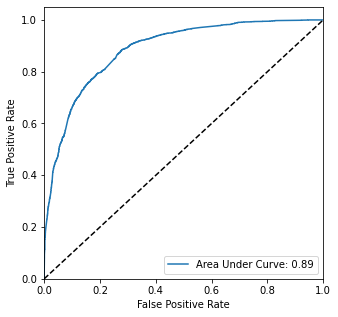

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

- The Area under ROC curve is 0.89, which is good

#### Finding Optimal cutoff point i.e. Threshold for max AUC

In [115]:
#Lets create columns with different probability cutoffs (threshold)
numbers = [float(x)/10 for x in range(10)]

In [116]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [117]:
#Create new column in dataframe for each cutoff value
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061875,0,1,0,0,0,0,0,0,0,0,0
1,0,0.163485,0,1,1,0,0,0,0,0,0,0,0
2,0,0.619053,1,1,1,1,1,1,1,1,0,0,0
3,1,0.640064,1,1,1,1,1,1,1,1,0,0,0
4,1,0.912853,1,1,1,1,1,1,1,1,1,1,1


In [118]:
#Now lets calculate 3 metrics for each cut-off (threshold) value, which are, Sensitivity, Specificity and Accuracy

In [119]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
cutoff_df.head()

,prob,accuracy,sensitivity,specificity


In [120]:
for i in numbers:
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final[i])
    sens = TP/(TP+FN)
    spec = TN/(TN+FP)
    cutoff_df.loc[i] = [i, accuracy, sens, spec]

In [121]:
cutoff_df.head(20)

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.579436,0.985282,0.325224
0.2,0.2,0.759880,0.918643,0.660435
0.3,0.3,0.785231,0.873671,0.729834
0.4,0.4,0.808534,0.759199,0.839437
0.5,0.5,0.810738,0.697056,0.881946
0.6,0.6,0.802708,0.630008,0.910883
0.7,0.7,0.778618,0.514718,0.943918
0.8,0.8,0.756416,0.418234,0.968246
0.9,0.9,0.708392,0.263287,0.987196


<AxesSubplot:xlabel='prob'>

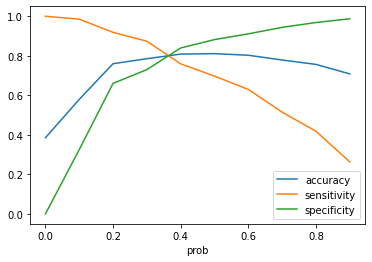

In [122]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

- From above, 0.37 seems to be optimal threshold

In [123]:
#update the predicted values based on new threshold
y_train_pred_final['predicted_final'] = y_train_pred_final.Conversion_prob.apply(lambda x : 1 if x>0.37 else 0)

In [124]:
y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_final
0,0,0.061875,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.163485,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.619053,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.640064,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.912853,1,1,1,1,1,1,1,1,1,1,1,1


In [129]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_final)

In [130]:
accuracy

0.8039678790741616

In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_final)

In [132]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

# TN FP
# FN TP

In [133]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
FPR = FP/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)

In [134]:
sensitivity, specificity, FPR, PPV, NPV, accuracy

(0.7800490596892886,
 0.8189500640204865,
 0.18104993597951344,
 0.7296367112810708,
 0.8559957173447538,
 0.8039678790741616)

### Precision and Recall
- Precision - Out of total Yeses predicted, how many are actually Yes
    - Precision = TP/(TP + FP)
- Recall - Out of total Yeses actual, how may yeses are predicted
    - Recall = TP/(TP + FN)

In [135]:
precision_final_model = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted_final)
recall_final_model = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted_final)

In [136]:
precision_final_model, recall_final_model

(0.7296367112810708, 0.7800490596892886)

### Plot precision recall curve

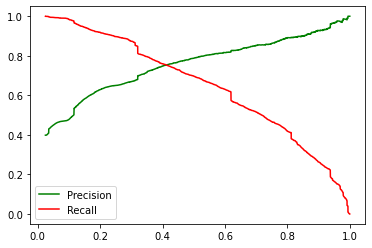

In [137]:
p, r, threshold = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)
plt.plot(threshold, p[:-1],"g-", label='Precision')
plt.plot(threshold, r[:-1], "r-", label = 'Recall')
plt.legend()
plt.show()

### Making prediction on test set

In [138]:
#Making predictions on test set using final model, which is model no 3 in this case

In [140]:
feat_scale_cols

['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']

In [141]:
X_test[feat_scale_cols] = scalar.transform(X_test[feat_scale_cols])

In [143]:
X_test[feat_scale_cols].describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,2723.000000,2723.000000,2723.000000
mean,0.013625,0.215404,0.098081
std,0.016088,0.245176,0.095786
min,0.000000,0.000000,0.000000
25%,0.003984,0.005391,0.041667
50%,0.011952,0.108266,0.083333
75%,0.019920,0.416891,0.125000
max,0.294821,1.020665,2.291667


In [145]:
#Use columns same as what we used to build final model, model#5
X_test=X_test[X_train.columns]

In [146]:
#Add constant
X_test_sm = sm.add_constant(X_test)

In [148]:
#Predict the target using final model
y_test_pred = model_3.predict(X_test_sm)

In [149]:
#converting y_test_pred into dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
y_test_df = pd.DataFrame(y_test)

In [154]:
#Removing index of both dataframes to append them side by side 
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
y_pred_final = pd.concat([y_pred_1, y_test_df], axis=1)

In [156]:
y_pred_final.head()

,0,Converted
0,0.040157,0
1,0.964435,1
2,0.032454,0
3,0.831585,1
4,0.044577,0


In [157]:
#Renaming columns
y_pred_final.columns = ['Converted_prod','Converted']

In [158]:
y_pred_final.head()

,Converted_prod,Converted
0,0.040157,0
1,0.964435,1
2,0.032454,0
3,0.831585,1
4,0.044577,0


In [159]:
#Now use agreed threshold
y_pred_final['pred'] = y_pred_final.Converted_prod.apply(lambda x : 1 if x>0.37 else 0)

In [160]:
y_pred_final.head()

,Converted_prod,Converted,pred
0,0.040157,0,0
1,0.964435,1,1
2,0.032454,0,0
3,0.831585,1,1
4,0.044577,0,0


In [169]:
def get_all_metrics(actual, pred):
    precision = str(round(precision_score(actual, pred),3)*100)+'%'
    recall = str(round(recall_score(actual, pred),2)*100)+'%'
    acc = str(round(metrics.accuracy_score(actual, pred),2)*100)+'%'
    confusion = metrics.confusion_matrix(actual, pred)
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    sens = str(round(TP/(TP+FN),2)*100)+'%'
    spec = str(round(TN/(TN+FP),2)*100)+'%'
    print(f"""Precision            : {precision} -> Total number of actual 1's from all predicted 1's """)
    print(f"""Recall/Sensitivity   : {recall} -> Total numbers of predicted 1's from actual no. of 1's""")
    print(f"""Specificity          : {spec} -> Total numbers of predicted 0's from actual no. of 0's""")
    print(f"""Accuracy             : {acc} -> Total predicted 1's and 0's from actual 1's and 0's""")

In [174]:
print("****** On final Model, Merics on training dataset******\n")
get_all_metrics(y_train_pred_final.Converted, y_train_pred_final.predicted)

****** On final Model, Merics on training dataset******

Precision            : 78.7% -> Total number of actual 1's from all predicted 1's 
Recall/Sensitivity   : 70.0% -> Total numbers of predicted 1's from actual no. of 1's
Specificity          : 88.0% -> Total numbers of predicted 0's from actual no. of 0's
Accuracy             : 81.0% -> Total predicted 1's and 0's from actual 1's and 0's


In [175]:
print("****** On final Model, Merics on test or unseen dataset *******\n")
get_all_metrics(y_pred_final.Converted, y_pred_final.pred)

****** On final Model, Merics on test or unseen dataset *******

Precision            : 72.2% -> Total number of actual 1's from all predicted 1's 
Recall/Sensitivity   : 78.0% -> Total numbers of predicted 1's from actual no. of 1's
Specificity          : 83.0% -> Total numbers of predicted 0's from actual no. of 0's
Accuracy             : 81.0% -> Total predicted 1's and 0's from actual 1's and 0's


In [176]:
model_3.params

const                                             0.014924
TotalVisits                                       5.923088
Total_Time_Spent_on_Website                       4.659829
Lead_Origin_Lead_Add_Form                         2.213888
Lead_Source_Welingak_Website                      1.964716
Last_Activity_Email_Bounced                      -2.092380
Last_Activity_Olark_Chat_Conversation            -1.271830
Last_Activity_SMS_Sent                            1.236630
Country_NA                                        1.570437
What_is_your_current_occupation_NA               -3.611952
What_is_your_current_occupation_Student          -2.202346
What_is_your_current_occupation_Unemployed       -2.336460
Last_Notable_Activity_Had_a_Phone_Conversation    3.681176
Last_Notable_Activity_Unreachable                 2.085249
dtype: float64

In [ ]:
### Add conclusion based on final model parameters and their coefficients